<a href="https://colab.research.google.com/github/shchUNAL/MetNumUN2023I/blob/main/Lab9/Group32_Taylor_ln_x_plus_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taylor series of $ln(x+1)$

$$ 
\begin{array}{lll}
ln(x+1)  & =  & \sum_{i=1}^{\infty} {-1^{n+1}} * \frac{x^i}{i} \\
        & = & 1 + -x + \frac{x^2}{2} + -\frac{x^3}{3} +\cdots+ -1^{n+1}\frac{x^n}{n} + \cdots  \\
       & = & 1 + -x + \frac{x^2}{2} +  -\frac{x^3}{3}  \cdots+ -1^{n+1} \frac{x^n}{n} + O(x^{n+1}) 
\end{array} 
$$


Approximation 
$$ ln(x+1)  \approx 1 + -x + \frac{x^2}{2} +  -\frac{x^3}{3}  \cdots+ -1^{n+1} \frac{x^n}{n}$$


Interact code in Sagemath for $ln(x+1)$

```python
# Interact Taylor Series of $$f(x) = ln(x+1)$$
# Explanatory example: Taylor Series – wiki.sagemath.org/interact https://wiki.sagemath.org/interact
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -20, 20, thickness=2)
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))

@interact
def _(order=slider([0 .. 12])):
  ft = f.taylor(x, x0, order)
  pt = plot(ft, -20, 20, color='green', thickness=2)
  pretty_print(html(r'$f(x)\;=\;%s$' % latex(f)))
  pretty_print(html(r'$\hat{f}(x;%s)\;=\;%s+\mathcal{O}(x^{%s})$' % (x0, latex(ft), order+1)))
  show(dot + p + pt, ymin=-1, ymax=10)
```

Animate code in Sagemath for $ln(x+1)$
```python
# Animate  Taylor Series of $$f(x) = e^x$$
# MCS 320: Introduction to Symbolic Computation - Jan Verschelde, Mathematics, U. Illinois at Chicago  –
# http://homepages.math.uic.edu/~jan/mcs320/mcs320notes/lec27.html#
x   = SR.var('x')
x0  = 0
f   = ln(x+1)
p   = plot(f, -3, 3, thickness=2,legend_label='f(x) = ln(x+1)')
dot = point((x0, f(x=x0)), pointsize=80, rgbcolor=(1, 0, 0))
ptaylor = [plot(f.taylor(x, x0, order), -3,3, color='green', thickness=2, legend_label= "Taylor " + str(order) +": "+ str(f.taylor(x, x0, order))) for order in range(5)]

frames = [p+dot+ptaylor[int(order/12)] for order in range(60)]
a = animate(frames, ymin=-10, ymax=10)
a.show()
a.save('ln_x_plus_1_taylor_animation_1.gif')
```

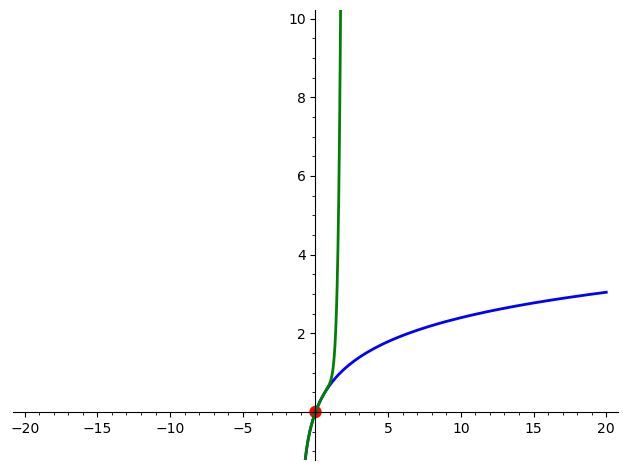

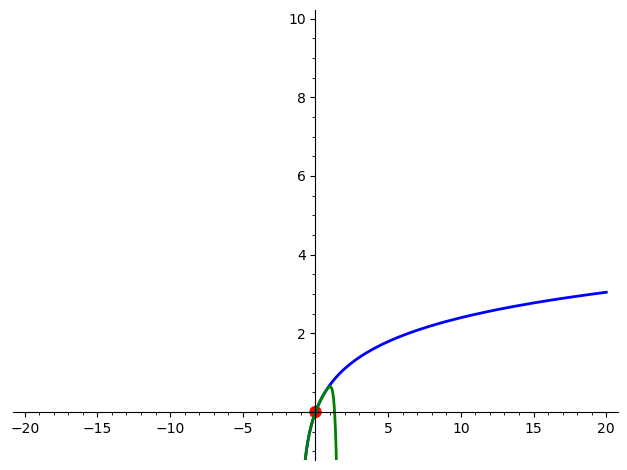

#What is value of the partial Taylor series of $ln(x+1)$ up to the  $10$-th term of $ln(x+1)$ about $0$ (Maclaurin  series) for $x=2$

$$ ln(x+1) =  1 + -x + \frac{x^2}{2} + -\frac{x^3}{3} +\cdots+ -1^{n+1}\frac{x^n}{n} $$

In [ ]:
# ∑_{i=0}^n  x^i/i
import numpy as np
import math

n = 10
x = 2
ln_x = 0
for i in range(1,n+1):
    ln_x += ((-1)**(i-1))*(x**i/(i))
    print(i, 'ln_x ≈ ∑_{i=1}^'+str(i),'[(-1)^('+str(i)+'-1)][(x^'+str(i)+'/'+str(i)+')] =',ln_x)   
print('ln(x+1) = ',np.log(x+1))

1 ln_x ≈ ∑_{i=1}^1 [(-1)^(1-1)][(x^1/1)] = 2.0
2 ln_x ≈ ∑_{i=1}^2 [(-1)^(2-1)][(x^2/2)] = 0.0
3 ln_x ≈ ∑_{i=1}^3 [(-1)^(3-1)][(x^3/3)] = 2.6666666666666665
4 ln_x ≈ ∑_{i=1}^4 [(-1)^(4-1)][(x^4/4)] = -1.3333333333333335
5 ln_x ≈ ∑_{i=1}^5 [(-1)^(5-1)][(x^5/5)] = 5.066666666666666
6 ln_x ≈ ∑_{i=1}^6 [(-1)^(6-1)][(x^6/6)] = -5.6
7 ln_x ≈ ∑_{i=1}^7 [(-1)^(7-1)][(x^7/7)] = 12.685714285714285
8 ln_x ≈ ∑_{i=1}^8 [(-1)^(8-1)][(x^8/8)] = -19.314285714285717
9 ln_x ≈ ∑_{i=1}^9 [(-1)^(9-1)][(x^9/9)] = 37.57460317460317
10 ln_x ≈ ∑_{i=1}^10 [(-1)^(10-1)][(x^10/10)] = -64.82539682539684
ln(x+1) =  1.0986122886681098


# What is the minimun $n$ for which the error between the Taylor series for $ln(x+1)$ about $0$ (Maclaurin  series) for $x$ and *math.log(x)*, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\sum_{n=1}^{\infty} (-1)^{n+1} \cdot  \frac{x^n}{n} - np.log(x+1) \right| < \epsilon$$

In [ ]:
# Returns Min n, |∑_{i=1}^{n}  x^i/i! - math.exp(x)| < epsilon and ∑_{i=0}^{n} x^i/i!   
import math
import numpy as np
x = 0.2
epsilon = 10**(-5)
ln_x = 0
print("n".rjust(10)," ","ln_x ≈ ∑_{i=1}^n (-1)^n+1*x^i/i ".center(21)," ","delta =(-1)^n+1*x^i/i  ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 1
while  epsilon <= error:
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  error = abs(np.log(x+1) - ln_x)
  print(format(i, '10'),"  ", format(ln_x, '.10f'),"  ",format(delta, '.10f')," ",format(error, '.10f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))

         n   ln_x ≈ ∑_{i=1}^n (-1)^n+1*x^i/i    delta =(-1)^n+1*x^i/i         error              epsilon       
         1    0.2000000000    0.2000000000   0.0176784432    1e-05
         2    0.1800000000    -0.0200000000   0.0023215568    1e-05
         3    0.1826666667    0.0026666667   0.0003451099    1e-05
         4    0.1822666667    -0.0004000000   0.0000548901    1e-05
         5    0.1823306667    0.0000640000   0.0000091099    1e-05
n = 5
x = 0.2
ln_x ≈ ∑_{i=1}^5 (-1)^n+1*x^i/i = 0.18233066666666667
epsilon = 1e-05
np.log(x+1) =  0.1823215567939546


In [ ]:
# Returns Min n, |∑_{i=1}^{n}  x^i/i! - math.exp(x)| < epsilon and ∑_{i=0}^{n} x^i/i!   
import numpy as np
import math

x = -4
epsilon = 10**(-5)

e_to_x = 0

print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(21)," ","delta =x^i/i! ".center(21)," ","error".center(14)," ","epsilon".center(20))
error = 1
i = 0
while  epsilon <= error:
  delta =  x**i / math.factorial(i) 
  e_to_x += delta
  error = abs(math.exp(x) - e_to_x)
  print(format(i, '10'),"  ", format(e_to_x, '.18f'),"  ",format(delta, '.17f')," ",format(error, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1


print("n =",i-1) 
print("x =",x) 
print('e_to_x ≈ ∑_{i=0}^'+str(i-1),'x^i/i! =',e_to_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('math.exp(x) = ',math.exp(x))

         n   ln_x ≈ ∑_{i=1}^n (-1)^n+1*x^i/i    delta =(-1)^n+1*x^i/i         error              epsilon       
         1    -0.2000000000    -0.2000000000   0.0231435513    1e-05
         2    -0.2200000000    -0.0200000000   0.0031435513    1e-05
         3    -0.2226666667    -0.0026666667   0.0004768846    1e-05
         4    -0.2230666667    -0.0004000000   0.0000768846    1e-05
         5    -0.2231306667    -0.0000640000   0.0000128846    1e-05
         6    -0.2231413333    -0.0000106667   0.0000022180    1e-05
n = 6
x = -0.2
ln_x ≈ ∑_{i=1}^6 (-1)^n+1*x^i/i = -0.22314133333333339
epsilon = 1e-05
np.log(x+1) =  -0.2231435513142097


# What is the minimun $n$ for which the $n$-th term of the Taylor series for $ln(x+1)$ about $0$ (Maclaurin  series) for $x$, is in absolute value less than  $\epsilon$.

$$\min_{n \in \mathbb{N}}\left|\frac{x^{n}}{n}\right| < \epsilon$$

In [ ]:
# Returns Min n, |x^{n}/n!| < epsilon and ∑_{i=0}^{n} x^i/i!
import math

x = 0.2
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    0.20000000000000001    0.20000000000000001    1e-05
         2    0.17999999999999999    -0.02000000000000000    1e-05
         3    0.18266666666666667    0.00266666666666667    1e-05
         4    0.18226666666666666    -0.00040000000000000    1e-05
         5    0.18233066666666667    0.00006400000000000    1e-05
         6    0.18232000000000001    -0.00001066666666667    1e-05
         7    0.18232182857142859    0.00000182857142857    1e-05
n = 7
x = 0.2
ln_x ≈ ∑_{i=1}^7 (-1)^n+1*x^i/i = 0.1823218285714286
epsilon = 1e-05
np.log(x+1) =  0.1823215567939546


In [ ]:
x = -0.2
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    -0.20000000000000001    -0.20000000000000001    1e-05
         2    -0.22000000000000003    -0.02000000000000000    1e-05
         3    -0.22266666666666671    -0.00266666666666667    1e-05
         4    -0.22306666666666672    -0.00040000000000000    1e-05
         5    -0.22313066666666673    -0.00006400000000000    1e-05
         6    -0.22314133333333339    -0.00001066666666667    1e-05
         7    -0.22314316190476197    -0.00000182857142857    1e-05
n = 7
x = -0.2
ln_x ≈ ∑_{i=1}^7 (-1)^n+1*x^i/i = -0.22314316190476197
epsilon = 1e-05
np.log(x+1) =  -0.2231435513142097


In [ ]:
x = 0.6
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    0.59999999999999998    0.59999999999999998    1e-05
         2    0.41999999999999998    -0.17999999999999999    1e-05
         3    0.49199999999999999    0.07199999999999999    1e-05
         4    0.45960000000000001    -0.03240000000000000    1e-05
         5    0.47515200000000002    0.01555200000000000    1e-05
         6    0.46737600000000001    -0.00777600000000000    1e-05
         7    0.47137508571428571    0.00399908571428571    1e-05
         8    0.46927556571428569    -0.00209952000000000    1e-05
         9    0.47039530971428567    0.00111974400000000    1e-05
        10    0.46979064795428566    -0.00060466176000000    1e-05
        11    0.47012046345974018    0.00032981550545455    1e-05
        12    0.46993906493174020    -0.00018139852800000    1e-05
        13    0.47003953180878638    0.00010046687704615    1e-05
        14    0.46998355740586067    -0.00005597440292571    1e-05


In [ ]:
x = -0.6
epsilon = 10**(-5)

ln_x = 0

delta = 1
i = 1
print("n".rjust(10)," ","∑_{i=0}^n x^i/i!".center(20)," "," delta=x^n/n!".center(20)," ","epsilon".center(9))
while  epsilon <= abs(delta):
  delta = ((-1)**(i+1))*(x**i/(i))
  ln_x += delta
  print(format(i, '10'),"  ", format(ln_x, '.17f'),"  ",format(delta, '.17f'),"  ","{:.0e}".format(epsilon)) 
  i = i+1

print("n =",i-1) 
print("x =",x) 
print('ln_x ≈ ∑_{i=1}^'+str(i-1),'(-1)^n+1*x^i/i =',ln_x)  
print("epsilon =","{:.0e}".format(epsilon)) 
print('np.log(x+1) = ',np.log(x+1))

         n     ∑_{i=0}^n x^i/i!         delta=x^n/n!        epsilon 
         1    -0.59999999999999998    -0.59999999999999998    1e-05
         2    -0.78000000000000003    -0.17999999999999999    1e-05
         3    -0.85199999999999998    -0.07199999999999999    1e-05
         4    -0.88439999999999996    -0.03240000000000000    1e-05
         5    -0.89995199999999997    -0.01555200000000000    1e-05
         6    -0.90772799999999998    -0.00777600000000000    1e-05
         7    -0.91172708571428573    -0.00399908571428571    1e-05
         8    -0.91382660571428576    -0.00209952000000000    1e-05
         9    -0.91494634971428579    -0.00111974400000000    1e-05
        10    -0.91555101147428575    -0.00060466176000000    1e-05
        11    -0.91588082697974027    -0.00032981550545455    1e-05
        12    -0.91606222550774030    -0.00018139852800000    1e-05
        13    -0.91616269238478643    -0.00010046687704615    1e-05
        14    -0.91621866678771213    -0.000055

# Error using the Lagrange's formula of the Residual $E_n$

* Form: Numerical Analysis Mathematics of Scientific Computing David Kincaid and Ward Cheney and Error estimates in Taylor approximations https://math.dartmouth.edu/~m8s17/ErrorEstimates.pdf

Error using the Lagrange's formula of the Residual $E_n$

For the Taylor series for $f(x) = ln(x+1)$ about $c=0$ (Maclaurin) 

Se tiene que la derivada $n+1$ de $ln(x+1) $ es $f^{(n+1)}(x) = (-1)^n(n!)(1+x)^{-(n+1)}$, entonces el error usado es:

$$ E_n = \frac{f^{(n+1)}(\xi)}{(n+1)!}(x-c)^{(n+1)} \le \frac{(-1)^n(n!)(1+x)^{-(n+1)}}{(n+1)!}x^{(n+1)} $$


En valor absoluto puesto que solo se necesita su magnitud:

$$ \left|\frac{x^{n+1}}{(n+1)(x+1)^{n+1}}\right| $$


What is the minimun $n$ for which the error using the Lagrange's formula of the Residual $E_n$ of the Taylos series for $ln(x+1)$ about $0$ (Maclaurin  series), is less than  $\epsilon$.
 

In [ ]:
# Retunrs Min n, |x^{n+1}/(n+1)| < epsilon and ∑_{i=1}^{n+1}  [(-1)^(i-1)][(x^i/i)]|
import math

x = 0.9
epsilon = 10**(-12)
ln_of_x_1 = 0
i = 1
error = x**(i+1) / ((i+1)*(x+1)**(i+1))
print("n".rjust(10)," ","∑_{i=1}^n  x^i/i!".center(21)," ","error=ln(x+1) x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(ln_of_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  ln_of_x_1 +=  ((-1)**(i-1))*(x**i/(i))
  error = x**(i+1) / ((i+1)*(x+1)**(i+1))
  
  print(format(i, '10'),"  ", format(ln_of_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('ln_of_x_1 ≈ ∑_{i=1}^'+str(i-1),'[(-1)^(i-1)][(x^i/i)] =',ln_of_x_1)    
print('math.log(x+1) = ',math.log(x+1))

         n     ∑_{i=1}^n  x^i/i!     error=ln(x+1) x^(n+1)/(n+1)!         epsilon       
         1    0.00000000000000000    0.11218836565096954    0.00000000000100000
         1    0.90000000000000002    0.11218836565096954    0.00000000000100000
         2    0.49500000000000000    0.03542790494241144    0.00000000000100000
         3    0.73799999999999999    0.01258622938743564    0.00000000000100000
         4    0.57397500000000001    0.00476951850471246    0.00000000000100000
         5    0.69207300000000005    0.00188270467291281    0.00000000000100000
         6    0.60349950000000008    0.00076440640855107    0.00000000000100000
         7    0.67182762857142864    0.00031682634038630    0.00000000000100000
         8    0.61801922732142867    0.00013340056437318    0.00000000000100000
         9    0.66106594832142873    0.00005687076691699    0.00000000000100000
        10    0.62619810431142875    0.00002448980393554    0.00000000000100000
        11    0.654726340319610

In [ ]:
# Retunrs Min n, |x^{n+1}/(n+1)| < epsilon and ∑_{i=1}^{n+1}  [(-1)^(i-1)][(x^i/i)]|
import math

x = -0.4 ## su magnitud debe ser menor a 0.5 puesto que la division podria diverger a un numero muy grande
epsilon = 10**(-12)
ln_of_x_1 = 0
i = 1
error = x**(i+1) / ((i+1)*(x+1)**(i+1))
print("n".rjust(10)," ","∑_{i=1}^n  x^i/i!".center(21)," ","error=ln(x+1) x^(n+1)/(n+1)!".center(20)," ","epsilon".center(20))
print(format(i, '10'),"  ", format(ln_of_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f'))
while  epsilon <= abs(error):
  ln_of_x_1 +=  ((-1)**(i-1))*(x**i/(i))
  error = x**(i+1) / ((i+1)*(x+1)**(i+1))
  
  print(format(i, '10'),"  ", format(ln_of_x_1, '.17f'),"  ",format(error, '.17f'),"  ",format(epsilon, '.17f')) 
  i = i+1
print("n = ",i-1) 
print('x = ',x)
print('ln_of_x_1 ≈ ∑_{i=1}^'+str(i-1),'[(-1)^(i-1)][(x^i/i)] =',ln_of_x_1)    
print('math.log(x+1) = ',math.log(x+1))

         n     ∑_{i=1}^n  x^i/i!     error=ln(x+1) x^(n+1)/(n+1)!         epsilon       
         1    0.00000000000000000    0.22222222222222227    0.00000000000100000
         1    -0.40000000000000002    0.22222222222222227    0.00000000000100000
         2    -0.48000000000000004    -0.09876543209876547    0.00000000000100000
         3    -0.50133333333333341    0.04938271604938273    0.00000000000100000
         4    -0.50773333333333337    -0.02633744855967080    0.00000000000100000
         5    -0.50978133333333342    0.01463191586648378    0.00000000000100000
         6    -0.51046400000000014    -0.00836109478084787    0.00000000000100000
         7    -0.51069805714285732    0.00487730528882793    0.00000000000100000
         8    -0.51077997714285728    -0.00289025498597210    0.00000000000100000
         9    -0.51080910425396842    0.00173415299158326    0.00000000000100000
        10    -0.51081959001396837    -0.00105100181308077    0.00000000000100000
        11    -0

##Sympy

Taylor Series Expansion with Python from Data Science Fabric

https://dsfabric.org/taylor-series-expansion-with-python

In [ ]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp, log
from sympy.plotting import plot
import matplotlib.pyplot as plt
import math

In [ ]:
# Define symbol
x = Symbol('x')

In [ ]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    Parameter "function" is our function which we want to approximate
    "x0" is the point where to approximate
    "n" is the order of approximation
    """
    return function.series(x,x0,n).removeO()

In [ ]:
print('ln(x+1) ≅', taylor(log((x+1), math.e), 0, 4))

ln(x+1) ≅ 0.333333333333333*x**3 - 0.5*x**2 + 1.0*x


In [ ]:
print('ln(2) =', taylor(log(x+1), 0, 4).subs(x,1))

ln(2) = 5/6


In [ ]:
print('Taylor 0 log((x+1) ≅', taylor(log(x+1), 0, 0))
print('Taylor 1 log((x+1) ≅', taylor(log(x+1), 0, 1))
print('Taylor 2 log((x+1) ≅', taylor(log(x+1), 0, 2))
print('Taylor 3 log((x+1) ≅', taylor(log(x+1), 0, 3))
print('Taylor 4 log((x+1) ≅', taylor(log(x+1), 0, 4))
print('Taylor 5 log((x+1) ≅', taylor(log(x+1), 0, 5))
print('Taylor 6 log((x+1) ≅', taylor(log(x+1), 0, 6))
print('Taylor 7 log((x+1) ≅', taylor(log(x+1), 0, 7))
print('Taylor 8 log((x+1) ≅', taylor(log(x+1), 0, 8))

Taylor 0 log((x+1) ≅ 0
Taylor 1 log((x+1) ≅ 0
Taylor 2 log((x+1) ≅ x
Taylor 3 log((x+1) ≅ -x**2/2 + x
Taylor 4 log((x+1) ≅ x**3/3 - x**2/2 + x
Taylor 5 log((x+1) ≅ -x**4/4 + x**3/3 - x**2/2 + x
Taylor 6 log((x+1) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 7 log((x+1) ≅ -x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x
Taylor 8 log((x+1) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + x


In [ ]:
print('Taylor 0 log(x+1) ≅', taylor(log(x+1), 0, 0).subs(x+1,2),' = ',taylor(log(x+1), 0, 0).subs(x+1,2).evalf())
print('Taylor 1 log(x+1) ≅', taylor(log(x+1), 0, 1).subs(x+1,2),' = ',taylor(log(x+1), 0, 1).subs(x+1,2).evalf())
print('Taylor 2 log(x+1) ≅', taylor(log(x+1), 0, 2).subs(x+1,2),' = ',taylor(log(x+1), 0, 2).subs(x+1,2).evalf())
print('Taylor 3 log(x+1) ≅', taylor(log(x+1), 0, 3).subs(x+1,2),' = ',taylor(log(x+1), 0, 3).subs(x+1,2).evalf())
print('Taylor 4 log(x+1) ≅', taylor(log(x+1), 0, 4).subs(x+1,2),' = ',taylor(log(x+1), 0, 4).subs(x+1,2).evalf())
print('Taylor 5 log(x+1) ≅', taylor(log(x+1), 0, 5).subs(x+1,2),' = ',taylor(log(x+1), 0, 5).subs(x+1,2).evalf())
print('Taylor 6 log(x+1) ≅', taylor(log(x+1), 0, 6).subs(x+1,2),' = ',taylor(log(x+1), 0, 6).subs(x+1,2).evalf())
print('Taylor 7 log(x+1) ≅', taylor(log(x+1), 0, 8).subs(x+1,2),' = ',taylor(log(x+1), 0, 7).subs(x+1,2).evalf())

Taylor 0 log(x+1) ≅ 0  =  0
Taylor 1 log(x+1) ≅ 0  =  0
Taylor 2 log(x+1) ≅ x  =  x
Taylor 3 log(x+1) ≅ 1 - x**2/2  =  1.0 - 0.5*x**2
Taylor 4 log(x+1) ≅ x**3/3 - x**2/2 + 1  =  0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 5 log(x+1) ≅ -x**4/4 + x**3/3 - x**2/2 + 1  =  -0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 6 log(x+1) ≅ x**5/5 - x**4/4 + x**3/3 - x**2/2 + 1  =  0.2*x**5 - 0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0
Taylor 7 log(x+1) ≅ x**7/7 - x**6/6 + x**5/5 - x**4/4 + x**3/3 - x**2/2 + 1  =  -0.166666666666667*x**6 + 0.2*x**5 - 0.25*x**4 + 0.333333333333333*x**3 - 0.5*x**2 + 1.0


In [ ]:
import math
print('sympy log(x+1)subs(x+1,2) =', log(x+1).subs(x,2))
print('sympy log(x+1).subs(x,2).evalf() =', log(x+1).subs(x,2).evalf())
print('math.log(3) =', math.log(3))

sympy log(x+1)subs(x+1,2) = log(3)
sympy log(x+1).subs(x,2).evalf() = 1.09861228866811
math.log(3) = 1.0986122886681098


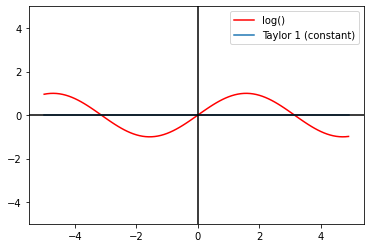

In [ ]:
values = np.arange(-5,5,0.1)
p_log = np.sin(values)
t_log1 = [taylor(log(x+1), 0, 1).subs(x,v) for v in values]
legends = ['log() ','Taylor 1 (constant)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log1)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


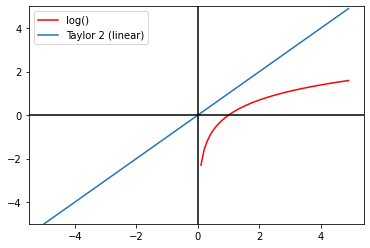

In [ ]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log2 = [taylor(log(x+1), 0, 2).subs(x,v) for v in values]
legends = ['log() ','Taylor 2 (linear)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log2)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


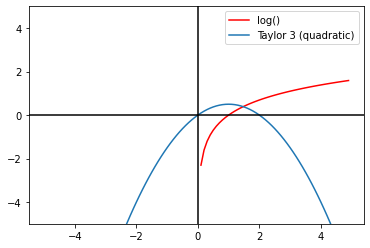

In [ ]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log3 = [taylor(log(x+1), 0, 3).subs(x,v) for v in values]
legends = ['log() ','Taylor 3 (quadratic)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log3)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


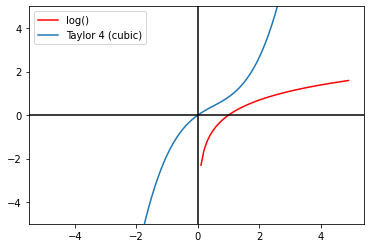

In [ ]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log4 = [taylor(log(x+1), 0, 4).subs(x,v) for v in values]
legends = ['log() ','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_log, color ='red')
ax.plot(values,t_log4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


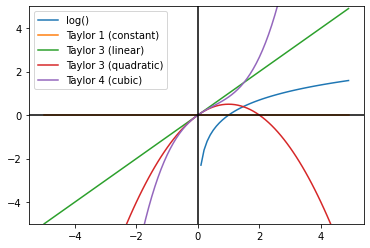

In [ ]:
values = np.arange(-5,5,0.1)
p_log = np.log(values)
t_log1 = [taylor(log(x+1), 0, 1).subs(x,v) for v in values]
t_log2 = [taylor(log(x+1), 0, 2).subs(x,v) for v in values]
t_log3 = [taylor(log(x+1), 0, 3).subs(x,v) for v in values]
t_log4 = [taylor(log(x+1), 0, 4).subs(x,v) for v in values]
legends = ['log() ','Taylor 1 (constant)','Taylor 3 (linear)','Taylor 3 (quadratic)','Taylor 4 (cubic)']

fig, ax = plt.subplots()
ax.plot(values,p_log)
ax.plot(values,t_log1)
ax.plot(values,t_log2)
ax.plot(values,t_log3)
ax.plot(values,t_log4)

ax.set_ylim([-5,5])
ax.axhline(y=0.0, xmin=-5.0, xmax=5.0, color='black')
ax.axvline(x=0.0, ymin=-10.0, ymax=10.0, color='black')
ax.legend(legends)

plt.show()